Problem 1(a)

In [26]:
import numpy as np
import pylab as pl
from sklearn.datasets import load_iris
iris_dataset = load_iris()
X = iris_dataset['data'] # features
Y = iris_dataset['target']


In [27]:
print("Mean of features: \n")
mean_X1 = np.mean(X[:,0], axis=0)
print("Mean of feature X1: ", mean_X1)
mean_X2 = np.mean(X[:,1], axis=0)
print("Mean of feature X2: ", mean_X2)
mean_X3 = np.mean(X[:,2], axis=0)
print("Mean of feature X3: ", mean_X3)
mean_X4 = np.mean(X[:,3], axis=0)
print("Mean of feature X4: ", mean_X4)

Mean of features: 

Mean of feature X1:  5.843333333333334
Mean of feature X2:  3.0573333333333337
Mean of feature X3:  3.7580000000000005
Mean of feature X4:  1.1993333333333336


In [28]:
print("Standard Deviation of Class 0: \n")
sd_X1 = np.std(X[:,0], axis=0)
print("Standard Deviation of feature X1: ", sd_X1)
sd_X2 = np.std(X[:,1], axis=0)
print("Standard Deviation of feature X2:", sd_X2)
sd_X3 = np.std(X[:,2], axis=0)
print("Standard Deviation of feature X3: ", sd_X3)
sd_X4 = np.std(X[:,3], axis=0)
print("Standard Deviation of feature X4: ", sd_X4, "\n")

Standard Deviation of Class 0: 

Standard Deviation of feature X1:  0.8253012917851409
Standard Deviation of feature X2: 0.4344109677354946
Standard Deviation of feature X3:  1.759404065775303
Standard Deviation of feature X4:  0.7596926279021594 



In [29]:
from sklearn import preprocessing
for i in range(X.shape[0]):
    X[i,0] = (X[i,0]-mean_X1)/sd_X1
    X[i,1] = (X[i,1]-mean_X2)/sd_X2
    X[i,2] = (X[i,2]-mean_X3)/sd_X3
    X[i,3] = (X[i,3]-mean_X4)/sd_X4

In [31]:
print("a) \n", X[0:5])

a) 
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


Problem1(b)

In [32]:
X = iris_dataset['data'] # features
Y = iris_dataset['target']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
standardized_X = scaler.transform(X)
print("b) \n", X[0:5])

b) 
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


# Problem 2

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred =knn.predict(X_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 1 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [35]:
print(knn.score(X_test, y_test))

0.9473684210526315


In [36]:
print(y_test)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


In [37]:
print(np.where(y_test != y_pred))
print("At index 10, class 2 was missclassified as class 1.", "\n", "At index 37, Class 1 was missclassified as class 2")

(array([10, 37], dtype=int64),)
At index 10, class 2 was missclassified as class 1. 
 At index 37, Class 1 was missclassified as class 2


In [38]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  1  8]]


In [39]:
print("Predicted class is: ", knn.predict([[5.0,3.2,1.5,0.3]]))

Predicted class is:  [2]


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X[:,:2], Y, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred =knn.predict(X_test)
print(y_pred)

[1 2 0 2 0 1 0 2 1 2 2 2 2 2 1 0 2 1 0 0 1 1 0 0 2 0 0 2 1 0 2 1 0 1 2 1 0
 1]


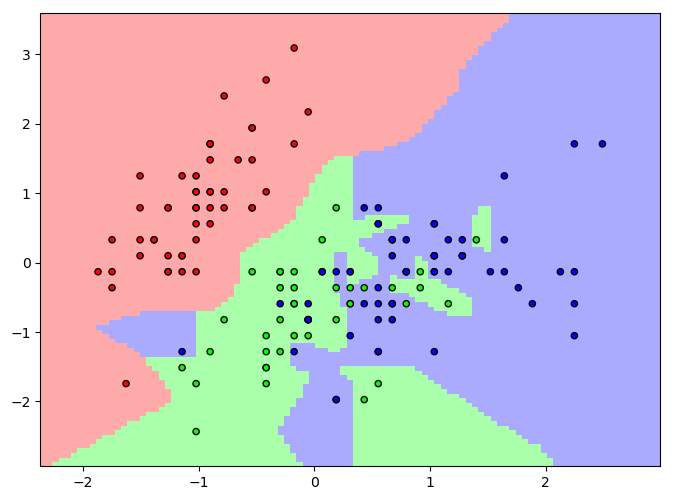

In [43]:
from matplotlib.colors import ListedColormap
import pylab as plt
# Draw the contour and boundary
# Our 2-dimensional distribution will be over variables X and Y
h = .02 # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
N = 100
xm = np.linspace(X[:,0].min()-0.5,X[:,0].max()+0.5,N)
ym = np.linspace(X[:,1].min()-0.5,X[:,1].max()+0.5,N)
xx, yy = np.meshgrid(xm, ym)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6), dpi=100)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

[1 1 0 2 0 2 0 2 2 2 1 2 2 2 2 0 2 1 0 0 1 1 0 0 2 0 0 2 1 0 2 1 0 2 2 1 0
 1]


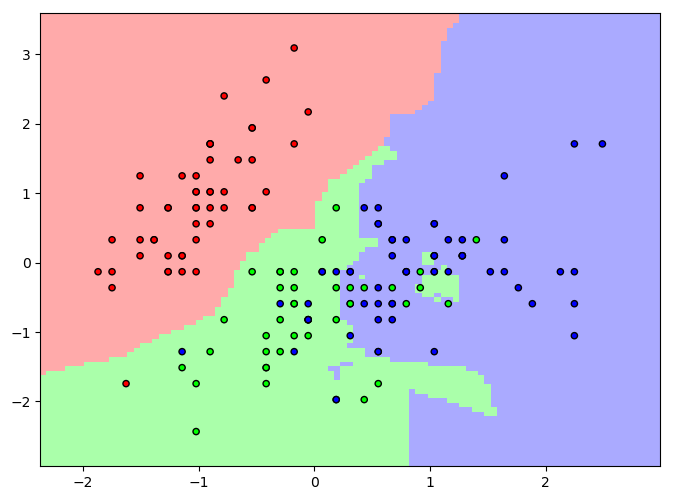

In [44]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred =knn.predict(X_test)
print(y_pred)
from matplotlib.colors import ListedColormap
import pylab as plt
# Draw the contour and boundary
# Our 2-dimensional distribution will be over variables X and Y
h = .02 # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
N = 100
xm = np.linspace(X[:,0].min()-0.5,X[:,0].max()+0.5,N)
ym = np.linspace(X[:,1].min()-0.5,X[:,1].max()+0.5,N)
xx, yy = np.meshgrid(xm, ym)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6), dpi=100)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

[1 1 0 2 0 2 0 2 2 2 1 2 2 2 2 0 1 1 0 0 1 1 0 0 2 0 0 2 1 0 2 1 0 2 2 1 0
 1]


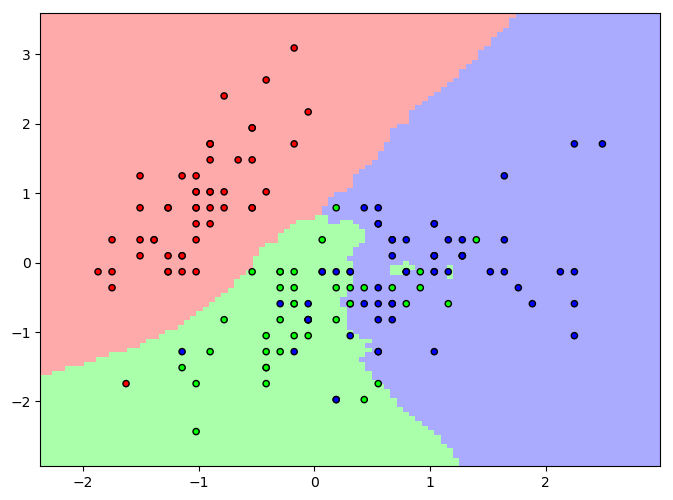

In [45]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred =knn.predict(X_test)
print(y_pred)
from matplotlib.colors import ListedColormap
import pylab as plt
# Draw the contour and boundary
# Our 2-dimensional distribution will be over variables X and Y
h = .02 # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
N = 100
xm = np.linspace(X[:,0].min()-0.5,X[:,0].max()+0.5,N)
ym = np.linspace(X[:,1].min()-0.5,X[:,1].max()+0.5,N)
xx, yy = np.meshgrid(xm, ym)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6), dpi=100)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

[1 1 0 2 0 2 0 2 2 1 1 2 1 2 1 0 1 1 0 0 1 1 0 0 1 0 0 2 1 0 2 0 0 2 2 1 0
 1]


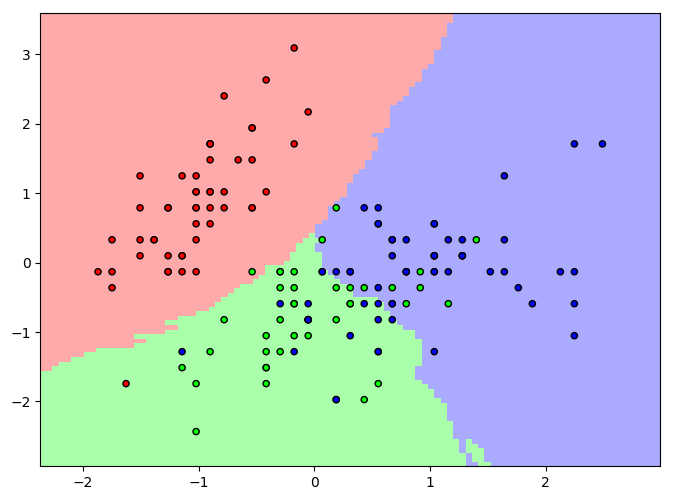

In [46]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred =knn.predict(X_test)
print(y_pred)
from matplotlib.colors import ListedColormap
import pylab as plt
# Draw the contour and boundary
# Our 2-dimensional distribution will be over variables X and Y
h = .02 # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
N = 100
xm = np.linspace(X[:,0].min()-0.5,X[:,0].max()+0.5,N)
ym = np.linspace(X[:,1].min()-0.5,X[:,1].max()+0.5,N)
xx, yy = np.meshgrid(xm, ym)
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6), dpi=100)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [53]:
trainS =[]
testS = []
K=[1,2,5,10,20,30,40,50];
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred =knn.predict(X_test)
    trainS.append(1-knn.score(X_train, y_train))
    testS.append(1-knn.score(X_test, y_test))
print(trainS)
print(testS)

[0.0625, 0.125, 0.1517857142857143, 0.1875, 0.1607142857142857, 0.1696428571428571, 0.1964285714285714, 0.1785714285714286]
[0.3157894736842105, 0.21052631578947367, 0.3157894736842105, 0.2894736842105263, 0.26315789473684215, 0.2894736842105263, 0.26315789473684215, 0.26315789473684215]


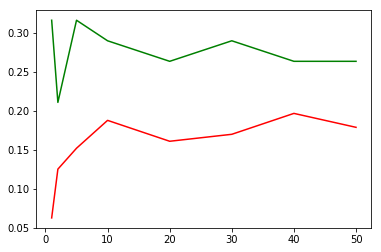

In [62]:
plt.plot(K, testS, "g")
plt.plot(K, trainS, "r")
plt.show()

K = 40 seems to be the bestfit for both training and test data